In [1]:
import matplotlib.pyplot as plt
import shap
import pandas as pd
import numpy as np # Assuming numpy might be needed

# Import necessary model and pipeline classes
from xgboost import XGBRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                              ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor,
                              HistGradientBoostingRegressor)
from sklearn.linear_model import (Ridge, LinearRegression, Lars, RidgeCV)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split # For placeholder data
from sklearn.preprocessing import StandardScaler # Example preprocessing
from sklearn.datasets import make_regression # Import make_regression
from sklearn.base import clone # To clone models if needed

In [ ]:
monthly_dataset = pd.read_parquet("C:\Users\acer\Desktop\final_code\data\monthly_dataset_3sep.parquet", engine='pyarrow')
# /mnt/e/flux_ET_dataset/terra_climate/edited_monthly/monthly_dataset_3sep.parquet


In [3]:
monthly_dataset = monthly_dataset.rename(columns={'def': 'Wdef',
                                                  'srad': 'Srad',
                                                    'tmmx': 'Tmax',
                                                    'tmmn': 'Tmin',
                                                    'vpd': 'Vpd',
                                                    'pet': 'PET',
                                                    'dewpoint_temperature_2m': 'dew2',
                                                    'dewpoint_temperature_2m_max': 'dew2max',
                                                    'dewpoint_temperature_2m_min': 'dew2min',
                                                    'leaf_area_index_high_vegetation': 'lai_high',
                                                    'leaf_area_index_low_vegetation': 'lai_low',
                                                    'soil_temperature_level_1': 'soilT_1',
                                                    'soil_temperature_level_2': 'soilT_2',
                                                    'soil_temperature_level_3': 'soilT_3',
                                                    'soil_temperature_level_4': 'soilT_4',
                                                    'surface_net_solar_radiation_max': 'r_max',
                                                    'surface_net_solar_radiation_sum': 'r_sum',
                                                    'surface_pressure': 's_pressure',
                                                    'surface_pressure_max': 's_p_max',
                                                    'surface_pressure_min': 's_p_min',
                                                    'surface_sensible_heat_flux_max': 'ss_flux_max',
                                                    'surface_solar_radiation_downwards_max': 'ss_r_d_max',
                                                    'surface_thermal_radiation_downwards_max': 'st_r_d_max',
                                                    'surface_thermal_radiation_downwards_min': 'st_r_d_min',
                                                    'temperature_2m': 'T_2m',
                                                    'temperature_2m_max': 'T_2m_max',
                                                    'temperature_2m_min': 'T_2m_min',
                                                    'total_precipitation_max': 'pr_max',
                                                    'u_component_of_wind_10m_max': 'u_wind10max',
                                                    'v_component_of_wind_10m_max': 'v_wind10max',
                                                    'volumetric_soil_water_layer_1': 'soil_water_1',
                                                    'volumetric_soil_water_layer_2': 'soil_water_2',
                                                    'volumetric_soil_water_layer_3': 'soil_water_3',
                                                    'volumetric_soil_water_layer_4': 'soil_water_4',
                                                    'ET_fill': 'ETa',
                                                    'category_encoded_Site_ID':'Site_ID',
                                                    'category_encoded_General_classification':'General_class',
                                                    'category_encoded_Land_cover_details':'LC_detail',
                                                    'category_encoded_Land_cover_type':'LC_type',
                                                    'forecast_albedo':'albedo'})

In [4]:
monthly_dataset = monthly_dataset.drop(["evaporation_from_bare_soil_max",
                                        "evaporation_from_bare_soil_min",
                                        "evaporation_from_bare_soil_sum",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_max",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_min",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_sum",
                                        "evaporation_from_the_top_of_canopy_max",
                                        "evaporation_from_the_top_of_canopy_min",
                                        "evaporation_from_the_top_of_canopy_sum",
                                        "evaporation_from_vegetation_transpiration_max",
                                        "evaporation_from_vegetation_transpiration_min",
                                        "evaporation_from_vegetation_transpiration_sum",
                                        "forecast_albedo_min",
                                        "lake_bottom_temperature",
                                        "lake_bottom_temperature_max",
                                        "lake_bottom_temperature_min",
                                        "lake_ice_depth",
                                        "lake_ice_depth_max",
                                        "lake_ice_depth_min",
                                        "lake_ice_temperature",
                                        "lake_ice_temperature_max",
                                        "lake_ice_temperature_min",
                                        "lake_mix_layer_depth",
                                        "lake_mix_layer_depth_max",
                                        "lake_mix_layer_depth_min",
                                        "lake_mix_layer_temperature",
                                        "lake_mix_layer_temperature_max",
                                        "lake_mix_layer_temperature_min",
                                        "lake_shape_factor",
                                        "lake_shape_factor_max",
                                        "lake_shape_factor_min",
                                        "lake_total_layer_temperature",
                                        "lake_total_layer_temperature_max",
                                        "lake_total_layer_temperature_min",
                                        "potential_evaporation_max",
                                        "potential_evaporation_min",
                                        "potential_evaporation_sum",
                                        "runoff_max",
                                        "runoff_min",
                                        "runoff_sum",
                                        "skin_reservoir_content",
                                        "skin_reservoir_content_max",
                                        "skin_reservoir_content_min",
                                        "skin_temperature",
                                        "skin_temperature_max",
                                        "skin_temperature_min",
                                        "snow_albedo",
                                        "snow_albedo_max",
                                        "snow_albedo_min",
                                        "snow_cover",
                                        "snow_cover_max",
                                        "snow_cover_min",
                                        "snow_density",
                                        "snow_density_max",
                                        "snow_density_min",
                                        "snow_depth",
                                        "snow_depth_max",
                                        "snow_depth_min",
                                        "snow_depth_water_equivalent",
                                        "snow_depth_water_equivalent_max",
                                        "snow_depth_water_equivalent_min",
                                        "snow_evaporation_max",
                                        "snow_evaporation_min",
                                        "snow_evaporation_sum",
                                        "snowfall_max",
                                        "snowfall_min",
                                        "snowfall_sum",
                                        "snowmelt_max",
                                        "snowmelt_min",
                                        "snowmelt_sum",
                                        "sub_surface_runoff_max",
                                        "sub_surface_runoff_min",
                                        "sub_surface_runoff_sum",
                                        "surface_latent_heat_flux_max",
                                        "surface_latent_heat_flux_min",
                                        "surface_latent_heat_flux_sum",
                                        "surface_net_solar_radiation_min",
                                        "surface_net_thermal_radiation_max",
                                        "surface_net_thermal_radiation_min",
                                        "surface_net_thermal_radiation_sum",
                                        "surface_runoff_max",
                                        "surface_runoff_min",
                                        "surface_runoff_sum",
                                        "surface_sensible_heat_flux_min",
                                        "surface_sensible_heat_flux_sum",
                                        "surface_solar_radiation_downwards_min",
                                        "surface_solar_radiation_downwards_sum",
                                        "surface_thermal_radiation_downwards_sum",
                                        "temperature_of_snow_layer",
                                        "temperature_of_snow_layer_max",
                                        "temperature_of_snow_layer_min",
                                        "total_evaporation_max",
                                        "total_evaporation_min",
                                        "total_evaporation_sum",
                                        "total_precipitation_min",
                                        "total_precipitation_sum",
                                        "u_component_of_wind_10m",
                                        "u_component_of_wind_10m_min",
                                        "v_component_of_wind_10m",
                                        "v_component_of_wind_10m_min",
                                        "leaf_area_index_low_vegetation_max",
                                        "leaf_area_index_low_vegetation_min",
                                        "leaf_area_index_high_vegetation_max",
                                        "leaf_area_index_high_vegetation_min",
                                        "forecast_albedo_max",
                                        "soil_temperature_level_1_max",
                                        "soil_temperature_level_1_min",
                                        "soil_temperature_level_2_max",
                                        "soil_temperature_level_2_min",
                                        "soil_temperature_level_3_max",
                                        "soil_temperature_level_3_min",
                                        "soil_temperature_level_4_min",
                                        "soil_temperature_level_4_max",
                                        "volumetric_soil_water_layer_1_max",
                                        "volumetric_soil_water_layer_1_min",
                                        "volumetric_soil_water_layer_2_max",
                                        "volumetric_soil_water_layer_2_min",
                                        "volumetric_soil_water_layer_3_max",
                                        "volumetric_soil_water_layer_3_min",
                                        "volumetric_soil_water_layer_4_max",
                                        "volumetric_soil_water_layer_4_min",
                                        "swe"], axis = 1)

X = monthly_dataset.drop(['ETa',
                          'Site_ID',
                          'General_classification',
                          'Land_cover_details',
                          'Land_cover_type',
                          'eto_hargreaves',
                          'time',
                          'date',
                          'aet',
                          'PET',
                          'delta_s',
                          'Wdef'], axis =1)


# 'def': 'Wdef',
# 'pet': 'PET',
# 'ET_fill': 'ETa'

y = monthly_dataset['ETa']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [ ]:
# Placeholder for Data Loading and Preprocessing
# Example placeholder data:
try:
    # Check if data exists from previous cells/runs
    X_train.shape, y_train.shape, X_test.shape, X.shape
    print("Using existing data.")
    # Ensure feature_names are available if data exists
    try:
        # Ensure feature_names is a pandas Index or similar for consistent indexing
        if isinstance(X.columns, pd.Index):
             feature_names = X.columns
        else:
             feature_names = pd.Index(X.columns) # Convert if needed
    except AttributeError:
        # If X is not a DataFrame or doesn't have columns
        feature_names = pd.Index([f'feature_{i}' for i in range(X_train.shape[1])])
        print("Warning: Using generic feature names as X.columns was not available for existing data.")

except NameError:
    print("Generating placeholder data...")
    # Generate synthetic data for demonstration
    X, y = make_regression(n_samples=200, n_features=20, n_informative=15, noise=0.1, random_state=42)
    X = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
    feature_names = X.columns # Store feature names (already a pd.Index)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features (Example preprocessing - adapt as needed)
    scaler = StandardScaler()
    # Fit on train, transform train and test
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Keep data as numpy arrays for consistency in this script
    # Feature names are stored in 'feature_names' variable

    print("Placeholder data generated and preprocessed.")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"Original feature names: {feature_names.tolist()}")


# ==============================================================================
# Modified SHAP Plotting Functions
# ==============================================================================

def tree_based_beeswarm(selector, X_test_data, feature_names_all, ax, title):
    """
    Calculates SHAP values for a tree-based model fitted within an RFE selector
    and plots a beeswarm plot on the given axes.

    Args:
        selector: Fitted RFE selector object.
        X_test_data: Test data (numpy array or DataFrame).
        feature_names_all: List or Index of *all* original feature names before selection.
        ax: Matplotlib Axes object to plot on.
        title: Title for the subplot.
    """
    print(f"Processing: {title}")
    try:
        # Get selected feature mask and names
        selected_features_mask = selector.support_
        # Use boolean mask on pandas Index or numpy array
        selected_features = feature_names_all[selected_features_mask]
        print(f"  Selected features: {selected_features.tolist()}")

        # Prepare selected test data
        if isinstance(X_test_data, pd.DataFrame):
            X_test_selected = X_test_data.iloc[:, selected_features_mask]
            X_test_selected.columns = selected_features
        else: # Assuming numpy array
            X_test_selected = X_test_data[:, selected_features_mask]
            X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

        print("  Calculating SHAP values (TreeExplainer)...")
        explainer_model = shap.TreeExplainer(selector.estimator_)
        shap_values = explainer_model(X_test_selected)
        print("  SHAP calculation complete.")

        print("  Plotting beeswarm...")
        shap.plots.beeswarm(shap_values, max_display=len(selected_features), show=False, ax=ax, plot_size=None)
        ax.set_title(title, fontsize=10)
        print(f"  Plotting complete for: {title}")

    except Exception as e:
        print(f"Error processing {title}: {e}")
        ax.set_title(f"{title}\nError: {e}", fontsize=8, color='red')

def nontree_beeswarm_permutation(selector, best_model, X_train_data, y_train_data, X_test_data, feature_names_all, ax, title):
    """
    Calculates SHAP values using PermutationExplainer for a non-tree model
    with RFE selection and plots a beeswarm plot on the given axes.

    Args:
        selector: Fitted RFE selector object.
        best_model: The base model instance used in RFE.
        X_train_data: Training data (numpy array or DataFrame).
        y_train_data: Training labels.
        X_test_data: Test data (numpy array or DataFrame).
        feature_names_all: List or Index of *all* original feature names before selection.
        ax: Matplotlib Axes object to plot on.
        title: Title for the subplot.
    """
    print(f"Processing: {title}")
    try:
        selected_features_mask = selector.support_
        selected_features = feature_names_all[selected_features_mask]
        print(f"  Selected features: {selected_features.tolist()}")

        if isinstance(X_train_data, pd.DataFrame):
            X_train_selected = X_train_data.iloc[:, selected_features_mask]
            X_test_selected = X_test_data.iloc[:, selected_features_mask]
            X_train_selected.columns = selected_features
            X_test_selected.columns = selected_features
        else: # Assuming numpy array
            X_train_selected = X_train_data[:, selected_features_mask]
            X_test_selected = X_test_data[:, selected_features_mask]
            X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
            X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

        print("  Fitting model on selected features for PermutationExplainer...")
        # Clone the model to ensure the original isn't modified if used elsewhere
        model_clone = clone(best_model)
        model_fitted_on_selected = model_clone.fit(X_train_selected, y_train_data)
        print("  Model fitting complete.")

        predict_fn = lambda x: model_fitted_on_selected.predict(x)

        print("  Calculating SHAP values (PermutationExplainer)...")
        explainer_model = shap.Explainer(predict_fn, X_test_selected, algorithm="permutation")
        shap_values = explainer_model(X_test_selected)
        print("  SHAP calculation complete.")

        print("  Plotting beeswarm...")
        shap.plots.beeswarm(shap_values, max_display=len(selected_features), show=False, ax=ax, plot_size=None)
        ax.set_title(title, fontsize=10)
        print(f"  Plotting complete for: {title}")

    except Exception as e:
        print(f"Error processing {title}: {e}")
        ax.set_title(f"{title}\nError: {e}", fontsize=8, color='red')

def nontree_beeswarm_pipeline(k, best_model, X_train_data, y_train_data, X_test_data, feature_names_all, ax, title):
    """
    Calculates SHAP values for a pipeline (SelectKBest + model) using PermutationExplainer,
    filters SHAP values to selected features, and plots a beeswarm plot.

    Args:
        k: Number of features for SelectKBest.
        best_model: The model instance.
        X_train_data: Training data (numpy array or DataFrame).
        y_train_data: Training labels.
        X_test_data: Test data (numpy array or DataFrame).
        feature_names_all: List or Index of *all* original feature names.
        ax: Matplotlib Axes object to plot on.
        title: Title for the subplot.
    """
    print(f"Processing: {title} (k={k})")
    try:
        pipeline = Pipeline([
            ('feature_selection', SelectKBest(score_func=f_regression, k=k)),
            ('regressor', clone(best_model)) # Clone model for safety
        ])
        print("  Fitting pipeline...")
        # Ensure X_train_data is DataFrame if pipeline steps require names,
        # otherwise numpy is fine for fit.
        if isinstance(X_train_data, pd.DataFrame):
             pipeline.fit(X_train_data, y_train_data)
        else:
             # Create temporary DataFrame for fitting if needed by steps, though
             # SelectKBest and many regressors work with numpy.
             # If errors occur, convert X_train_data to DataFrame here.
             pipeline.fit(X_train_data, y_train_data)
        print("  Pipeline fitting complete.")

        selected_features_mask = pipeline.named_steps['feature_selection'].get_support()
        selected_features = feature_names_all[selected_features_mask]
        n_selected = len(selected_features)
        print(f"  Selected features ({n_selected}): {selected_features.tolist()}")

        # Prepare test data as DataFrame with original feature names for Explainer
        if not isinstance(X_test_data, pd.DataFrame):
             X_test_df_local = pd.DataFrame(X_test_data, columns=feature_names_all)
        else:
             # Ensure the DataFrame has the correct columns in the original order
             X_test_df_local = X_test_data.copy() # Avoid modifying original test data
             if not X_test_df_local.columns.equals(feature_names_all):
                 print("Warning: X_test columns reordered to match feature_names_all for SHAP Explainer.")
                 X_test_df_local = X_test_df_local[feature_names_all]


        print("  Calculating SHAP values (PermutationExplainer on Pipeline)...")
        explainer = shap.Explainer(pipeline.predict, X_test_df_local, algorithm="permutation")
        shap_values_all_features = explainer(X_test_df_local)
        print("  SHAP calculation complete.")

        # --- Filtering SHAP values ---
        print(f"  Filtering SHAP values to keep only the {n_selected} selected features...")
        # SHAP Explanation objects can often be indexed by feature names.
        # Ensure selected_features is a list or compatible index.
        try:
            shap_values_selected = shap_values_all_features[:, selected_features.tolist()]
            print("  SHAP values filtered successfully.")
        except Exception as filter_e:
            print(f"  Error filtering SHAP values: {filter_e}. Plotting with all features (may show 'Sum other features').")
            # Fallback to original behavior if filtering fails
            shap_values_selected = shap_values_all_features


        print("  Plotting beeswarm...")
        # Pass the *filtered* SHAP values object.
        # max_display should match the number of features in shap_values_selected
        shap.plots.beeswarm(shap_values_selected, max_display=n_selected, show=False, ax=ax, plot_size=None)
        ax.set_title(title, fontsize=10)
        print(f"  Plotting complete for: {title}")

    except Exception as e:
        print(f"Error processing {title}: {e}")
        ax.set_title(f"{title}\nError: {e}", fontsize=8, color='red')

Using existing data.



--- Defining and Fitting Models ---

Fitting Tree Models with RFE...

Fitting Non-Tree Models with RFE...


/mnt/g/Mehdi_Stuff/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.52192e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Defining Non-Tree Models with Pipeline (SelectKBest)...

Total models prepared for plotting: 14

--- Creating Combined SHAP Plot ---
Processing: XGB (RFE k=7)
  Selected features: ['ppt', 'lat', 'lon', 'soilT_4', 'r_max', 'soil_water_1', 'Srad']
  Calculating SHAP values (TreeExplainer)...
  SHAP calculation complete.
  Plotting beeswarm...
  Plotting complete for: XGB (RFE k=7)
Processing: RF (RFE k=3)
  Selected features: ['ppt', 'lat', 'r_max']
  Calculating SHAP values (TreeExplainer)...
  SHAP calculation complete.
  Plotting beeswarm...
  Plotting complete for: RF (RFE k=3)
Processing: GB (RFE k=5)
  Selected features: ['ppt', 'lat', 'r_max', 'ss_flux_max', 'st_r_d_max']
  Calculating SHAP values (TreeExplainer)...
  SHAP calculation complete.
  Plotting beeswarm...
  Plotting complete for: GB (RFE k=5)
Processing: ExtraTrees (RFE k=13)
  Selected features: ['Month', 'ppt', 'lon', 'lai_high', 'r_max', 'ss_r_d_max', 'v_wind10max', 'soil_water_1', 'soil_water_2', 'pdsi', 'pr', 'LC

PermutationExplainer explainer: 100it [00:36,  2.70it/s]                       


  SHAP calculation complete.
  Plotting beeswarm...
  Plotting complete for: DTR (RFE k=14)
Processing: Ada (RFE k=6)
  Selected features: ['ppt', 'lai_high', 'r_max', 'ss_flux_max', 'st_r_d_max', 'pr']
  Fitting model on selected features for PermutationExplainer...
  Model fitting complete.
  Calculating SHAP values (PermutationExplainer)...


PermutationExplainer explainer: 100it [02:17,  1.49s/it]                       


  SHAP calculation complete.
  Plotting beeswarm...
  Plotting complete for: Ada (RFE k=6)
Processing: Ridge (RFE k=10)
  Selected features: ['lat', 'lon', 'albedo', 'soilT_1', 'soilT_2', 'soilT_3', 'soilT_4', 'soil_water_1', 'soil_water_2', 'vap']
  Fitting model on selected features for PermutationExplainer...
  Model fitting complete.
  Calculating SHAP values (PermutationExplainer)...
  SHAP calculation complete.
  Plotting beeswarm...
  Plotting complete for: Ridge (RFE k=10)
Processing: Linear (RFE k=15)
  Selected features: ['lat', 'albedo', 'soilT_1', 'soilT_2', 'soilT_3', 'soilT_4', 'pr_max', 'v_wind10max', 'soil_water_1', 'soil_water_2', 'Tmax', 'Tmin', 'vap', 'Vpd', 'General_class']
  Fitting model on selected features for PermutationExplainer...
  Model fitting complete.
  Calculating SHAP values (PermutationExplainer)...
  SHAP calculation complete.
  Plotting beeswarm...
  Plotting complete for: Linear (RFE k=15)
Processing: Lars (RFE k=14)
  Selected features: ['ppt', 'd

PermutationExplainer explainer: 100it [01:29,  1.03s/it]                       


  SHAP calculation complete.
  Filtering SHAP values to keep only the 14 selected features...
  SHAP values filtered successfully.
  Plotting beeswarm...
  Plotting complete for: Bagging (SelectKBest k=14)
Processing: HGB (SelectKBest k=14) (k=14)
  Fitting pipeline...
  Pipeline fitting complete.
  Selected features (14): ['Month', 'ppt', 'soilT_2', 'soilT_3', 'soilT_4', 'ss_flux_max', 'pr_max', 'v_wind10max', 'soil_water_1', 'soil_water_2', 'soil_water_3', 'pdsi', 'pr', 'Vpd']
  Calculating SHAP values (PermutationExplainer on Pipeline)...


PermutationExplainer explainer: 100it [00:58,  1.48it/s]                       


  SHAP calculation complete.
  Filtering SHAP values to keep only the 14 selected features...
  SHAP values filtered successfully.
  Plotting beeswarm...
  Plotting complete for: HGB (SelectKBest k=14)
Processing: MLPR (SelectKBest k=4) (k=4)
  Fitting pipeline...
  Pipeline fitting complete.
  Selected features (4): ['ppt', 'soil_water_1', 'soil_water_2', 'soil_water_3']
  Calculating SHAP values (PermutationExplainer on Pipeline)...


PermutationExplainer explainer: 100it [01:03,  1.30it/s]                       


  SHAP calculation complete.
  Filtering SHAP values to keep only the 4 selected features...
  SHAP values filtered successfully.
  Plotting beeswarm...
  Plotting complete for: MLPR (SelectKBest k=4)
Processing: KNN (SelectKBest k=9) (k=9)
  Fitting pipeline...
  Pipeline fitting complete.
  Selected features (9): ['Month', 'ppt', 'soilT_3', 'soilT_4', 'v_wind10max', 'soil_water_1', 'soil_water_2', 'soil_water_3', 'pr']
  Calculating SHAP values (PermutationExplainer on Pipeline)...


PermutationExplainer explainer: 100it [00:43,  1.60it/s]                       


  SHAP calculation complete.
  Filtering SHAP values to keep only the 9 selected features...
  SHAP values filtered successfully.
  Plotting beeswarm...
  Plotting complete for: KNN (SelectKBest k=9)

Combined plot saved successfully as 'combined_shap_beeswarm_plots_v4.png'


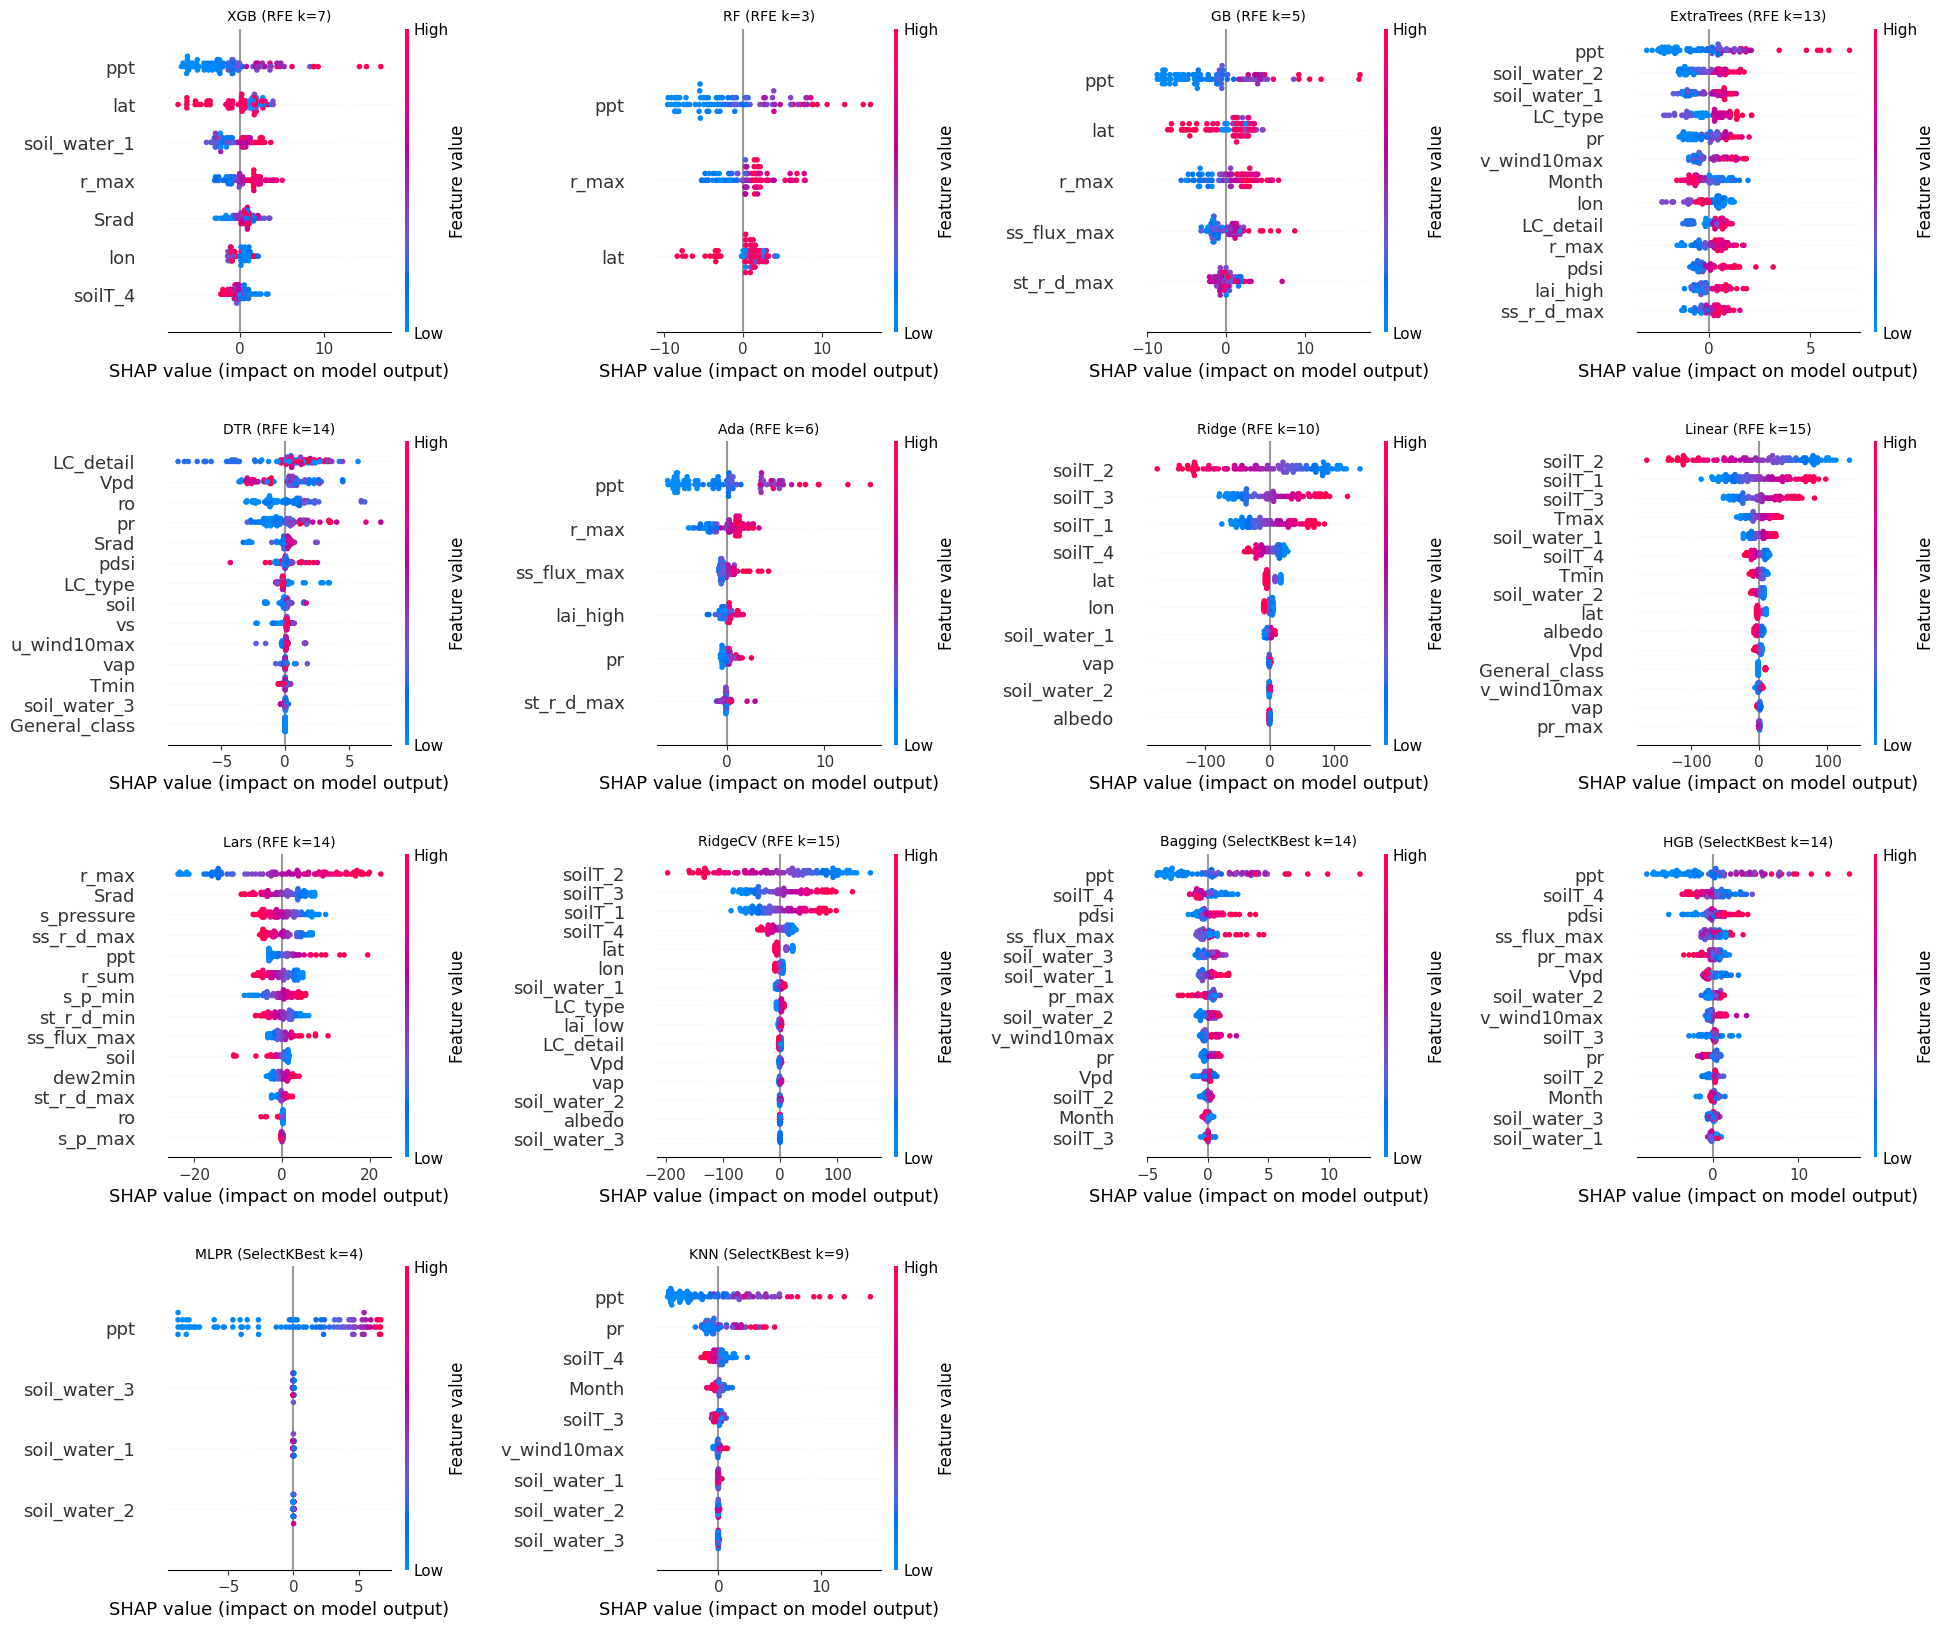

In [6]:
# ==============================================================================
# Model Definitions and Fitting
# ==============================================================================
print("\n--- Defining and Fitting Models ---")

# Using X_train, y_train, X_test (numpy arrays after scaling)
# Using feature_names (original column names as pd.Index)

models_to_plot = []

# --- Tree-based with RFE ---
print("\nFitting Tree Models with RFE...")
best_model_xgb = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, gamma=0.2, subsample=1.0, colsample_bytree=1.0, random_state=42)
selector_xgb = RFE(estimator=best_model_xgb, n_features_to_select=7)
selector_xgb.fit(X_train, y_train)
models_to_plot.append({'type': 'tree', 'selector': selector_xgb, 'title': 'XGB (RFE k=7)'})

best_model_rf = RandomForestRegressor(max_depth=None, max_leaf_nodes=20, min_samples_split=5, n_estimators=50, random_state=42)
selector_rf = RFE(estimator=best_model_rf, n_features_to_select=3)
selector_rf.fit(X_train, y_train)
models_to_plot.append({'type': 'tree', 'selector': selector_rf, 'title': 'RF (RFE k=3)'})

best_model_GB = GradientBoostingRegressor(random_state=42)
selector_GB = RFE(estimator=best_model_GB, n_features_to_select=5)
selector_GB.fit(X_train, y_train)
models_to_plot.append({'type': 'tree', 'selector': selector_GB, 'title': 'GB (RFE k=5)'})

best_model_ExtraTrees = ExtraTreesRegressor(bootstrap=True, max_depth=10, max_features=0.5, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=50, random_state=42)
selector_ExtraTrees = RFE(estimator=best_model_ExtraTrees, n_features_to_select=13)
selector_ExtraTrees.fit(X_train, y_train)
models_to_plot.append({'type': 'tree', 'selector': selector_ExtraTrees, 'title': 'ExtraTrees (RFE k=13)'})

best_model_DTR = DecisionTreeRegressor(criterion='friedman_mse', max_depth=9, max_features='sqrt', min_samples_leaf=5, random_state=0, splitter='random')
selector_DTR = RFE(estimator=best_model_DTR, n_features_to_select=14)
selector_DTR.fit(X_train, y_train)
models_to_plot.append({'type': 'nontree_perm', 'selector': selector_DTR, 'model': best_model_DTR, 'title': 'DTR (RFE k=14)'})


# --- Non-tree with RFE (using PermutationExplainer) ---
print("\nFitting Non-Tree Models with RFE...")
best_model_Ada = AdaBoostRegressor(learning_rate=0.25, loss='linear', n_estimators=50, random_state=42)
try:
    ada_base_estimator = DecisionTreeRegressor(max_depth=1)
    # Pass the AdaBoost *instance* to RFE, not the class
    rfe_ada_estimator = AdaBoostRegressor(estimator=ada_base_estimator, n_estimators=50, random_state=42, learning_rate=0.25)
    selector_Ada = RFE(estimator=rfe_ada_estimator, n_features_to_select=6)
    selector_Ada.fit(X_train, y_train)
    # Pass the original best_model_Ada instance for SHAP calculation consistency if needed,
    # or could pass selector_Ada.estimator_ which is the fitted AdaBoost inside RFE
    models_to_plot.append({'type': 'nontree_perm', 'selector': selector_Ada, 'model': best_model_Ada, 'title': 'Ada (RFE k=6)'})
except Exception as e:
    print(f"Skipping AdaBoost RFE due to error: {e}. Check base estimator compatibility.")


best_model_ridge = Ridge(alpha=0.1)
selector_ridge = RFE(estimator=best_model_ridge, n_features_to_select=10)
selector_ridge.fit(X_train, y_train)
models_to_plot.append({'type': 'nontree_perm', 'selector': selector_ridge, 'model': best_model_ridge, 'title': 'Ridge (RFE k=10)'})

best_model_lr = LinearRegression(copy_X=False, fit_intercept=True, n_jobs=5, positive=False)
selector_lr = RFE(estimator=best_model_lr, n_features_to_select=15)
selector_lr.fit(X_train, y_train)
models_to_plot.append({'type': 'nontree_perm', 'selector': selector_lr, 'model': best_model_lr, 'title': 'Linear (RFE k=15)'})


best_model_lars = Lars(n_nonzero_coefs=14)
# Fit Lars first as it might be needed for RFE coef_ calculation
best_model_lars.fit(X_train, y_train)
selector_lars = RFE(estimator=best_model_lars, n_features_to_select=14) # k must be <= n_nonzero_coefs
selector_lars.fit(X_train, y_train)
models_to_plot.append({'type': 'nontree_perm', 'selector': selector_lars, 'model': best_model_lars, 'title': 'Lars (RFE k=14)'})


best_model_ridgecv = RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, gcv_mode='eigen', store_cv_results=False)
best_model_ridgecv.fit(X_train, y_train)
selector_ridgecv = RFE(estimator=best_model_ridgecv, n_features_to_select=15)
selector_ridgecv.fit(X_train, y_train)
models_to_plot.append({'type': 'nontree_perm', 'selector': selector_ridgecv, 'model': best_model_ridgecv, 'title': 'RidgeCV (RFE k=15)'})


# --- Non-tree with Pipeline (SelectKBest + Model) ---
print("\nDefining Non-Tree Models with Pipeline (SelectKBest)...")
best_model_Bagging = BaggingRegressor(max_features=0.75, max_samples=0.75, n_estimators=75, random_state=42)
models_to_plot.append({'type': 'pipeline', 'k': 14, 'model': best_model_Bagging, 'title': 'Bagging (SelectKBest k=14)'})

best_model_HGB = HistGradientBoostingRegressor(learning_rate=0.1, loss='poisson', max_iter=100, random_state=42)
models_to_plot.append({'type': 'pipeline', 'k': 14, 'model': best_model_HGB, 'title': 'HGB (SelectKBest k=14)'})

best_model_MLPR = MLPRegressor(activation='tanh', hidden_layer_sizes=(100,), learning_rate='adaptive', solver='sgd', random_state=42, max_iter=500)
models_to_plot.append({'type': 'pipeline', 'k': 4, 'model': best_model_MLPR, 'title': 'MLPR (SelectKBest k=4)'})

best_model_kneighbors = KNeighborsRegressor(algorithm='kd_tree', n_neighbors=9, p=1, weights='uniform')
models_to_plot.append({'type': 'pipeline', 'k': 9, 'model': best_model_kneighbors, 'title': 'KNN (SelectKBest k=9)'})


print(f"\nTotal models prepared for plotting: {len(models_to_plot)}")

# ==============================================================================
# Create Combined Plot
# ==============================================================================
print("\n--- Creating Combined SHAP Plot ---")

n_models = len(models_to_plot)
ncols = 4
nrows = int(np.ceil(n_models / ncols))

fig_width = ncols * 5
fig_height = nrows * 4.5
plt.style.use('default')

fig, axes = plt.subplots(nrows, ncols, figsize=(fig_width, fig_height))

if n_models == 0:
    print("No models available to plot.")
    axes_flat = []
elif n_models == 1:
    # Ensure axes is always iterable
    axes_flat = [axes]
else:
    axes_flat = axes.flatten()

# Plot each model
plot_index = 0
for model_info in models_to_plot:
    if plot_index >= len(axes_flat):
        print(f"Warning: Not enough axes for model {model_info['title']}")
        break

    ax = axes_flat[plot_index]
    plot_type = model_info['type']
    title = model_info['title']

    try:
        if plot_type == 'tree':
            tree_based_beeswarm(
                selector=model_info['selector'],
                X_test_data=X_test,
                feature_names_all=feature_names, # Pass the pd.Index
                ax=ax,
                title=title
            )
        elif plot_type == 'nontree_perm':
            nontree_beeswarm_permutation(
                selector=model_info['selector'],
                best_model=model_info['model'],
                X_train_data=X_train,
                y_train_data=y_train,
                X_test_data=X_test,
                feature_names_all=feature_names, # Pass the pd.Index
                ax=ax,
                title=title
            )
        elif plot_type == 'pipeline':
            nontree_beeswarm_pipeline(
                k=model_info['k'],
                best_model=model_info['model'],
                X_train_data=X_train,
                y_train_data=y_train,
                X_test_data=X_test,
                feature_names_all=feature_names, # Pass the pd.Index
                ax=ax,
                title=title
            )
        plot_index += 1 # Increment plot index only on successful call start

    except Exception as e:
        print(f"!!! Critical Error calling plot function for {title}: {e}")
        ax.set_title(f"{title}\nPlotting Call Error: {e}", fontsize=8, color='red')
        plot_index += 1 # Ensure we move to the next axis even if a plot fails


# Hide unused subplots
for j in range(plot_index, len(axes_flat)):
    axes_flat[j].axis('off')

plt.tight_layout(pad=3.0, rect=[0, 0.02, 1, 0.96])
#fig.suptitle('SHAP Beeswarm Plots for Various Models and Feature Selection Methods', fontsize=18, y=0.99)


output_filename = 'combined_shap_beeswarm_plots_v4.png'
try:
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    print(f"\nCombined plot saved successfully as '{output_filename}'")
    plt.show()
except Exception as e:
    print(f"\nError saving plot: {e}")
    try:
        plt.show()
    except Exception as show_e:
        print(f"Error showing plot: {show_e}")